## Download 151 Pokemon to a a CSV File

In [3]:
import requests
import pandas as pd

In [45]:
# Funtion to GET generation 1 pokemon data from api and save to CSV file at path ./data/pokemon.csv. Store all battle stats in a dataframe.

def get_pokemon_data():
    # Get data from api
    url = 'https://pokeapi.co/api/v2/pokemon?limit=151'
    response = requests.get(url)
    data = response.json()
    pokemon = data['results']
    
    # Create dataframe to store data
    df = pd.DataFrame(columns=['name', 'id', 'type1', 'type2', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed'])
    
    # Loop through each pokemon and get data
    for i in range(len(pokemon)):
        pokemon_url = pokemon[i]['url']
        pokemon_response = requests.get(pokemon_url)
        pokemon_data = pokemon_response.json()
        
        # Get name
        name = pokemon_data['name']
        
        # Get id
        id = pokemon_data['id']
        
        # Get types
        types = pokemon_data['types']
        type1 = types[0]['type']['name']
        if len(types) == 2:
            type2 = types[1]['type']['name']
        else:
            type2 = None
        
        # Get stats
        stats = pokemon_data['stats']
        hp = stats[0]['base_stat']
        attack = stats[1]['base_stat']
        defense = stats[2]['base_stat']
        special_attack = stats[3]['base_stat']
        special_defense = stats[4]['base_stat']
        speed = stats[5]['base_stat']
        
        # concat data to dataframe
        df = pd.concat([df, pd.DataFrame([[name, id, type1, type2, hp, attack, defense, special_attack, special_defense, speed]], columns=['name', 'id', 'type1', 'type2', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed'])])
    
    # Save dataframe to CSV file
    df.to_csv('./data/pokemon.csv', index=False)

get_pokemon_data()

## Load Pokemon CSV into Pandas DataFrame?

In [46]:
# Load Pokemon csv file into a dataframe
poke_df = pd.read_csv('./data/pokemon.csv')

poke_df.head()

,name,id,type1,type2,hp,attack,defense,special_attack,special_defense,speed
0,bulbasaur,1,grass,poison,45,49,49,65,65,45
1,ivysaur,2,grass,poison,60,62,63,80,80,60
2,venusaur,3,grass,poison,80,82,83,100,100,80
3,charmander,4,fire,NaN,39,52,43,60,50,65
4,charmeleon,5,fire,NaN,58,64,58,80,65,80


In [47]:
# provide basic stats on the data
poke_df.describe()

,id,hp,attack,defense,special_attack,special_defense,speed
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,64.211921,72.913907,68.225166,67.139073,66.086093,69.066225
std,43.734045,28.590117,26.755421,26.916704,28.534199,24.208797,27.024598
min,1.000000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000
25%,38.500000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000
50%,76.000000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000
75%,113.500000,80.000000,92.000000,84.000000,87.500000,80.000000,90.000000
max,151.000000,250.000000,134.000000,180.000000,154.000000,125.000000,150.000000


In [48]:
# add a cvolumn to poke_df called "total_stats" that sums the Attack, Defense, Sp. Atk, Sp. Def, and Speed columns
poke_df['total_stats'] = poke_df['attack'] + poke_df['defense'] + poke_df['special_attack'] + poke_df['special_defense'] + poke_df['speed']

poke_df


,name,id,type1,type2,hp,attack,defense,special_attack,special_defense,speed,total_stats
0,bulbasaur,1,grass,poison,45,49,49,65,65,45,273
1,ivysaur,2,grass,poison,60,62,63,80,80,60,345
2,venusaur,3,grass,poison,80,82,83,100,100,80,445
3,charmander,4,fire,NaN,39,52,43,60,50,65,270
4,charmeleon,5,fire,NaN,58,64,58,80,65,80,347
...,...,...,...,...,...,...,...,...,...,...,...
146,dratini,147,dragon,NaN,41,64,45,50,50,50,259
147,dragonair,148,dragon,NaN,61,84,65,70,70,70,359
148,dragonite,149,dragon,flying,91,134,95,100,100,80,509
149,mewtwo,150,psychic,NaN,106,110,90,154,90,130,574


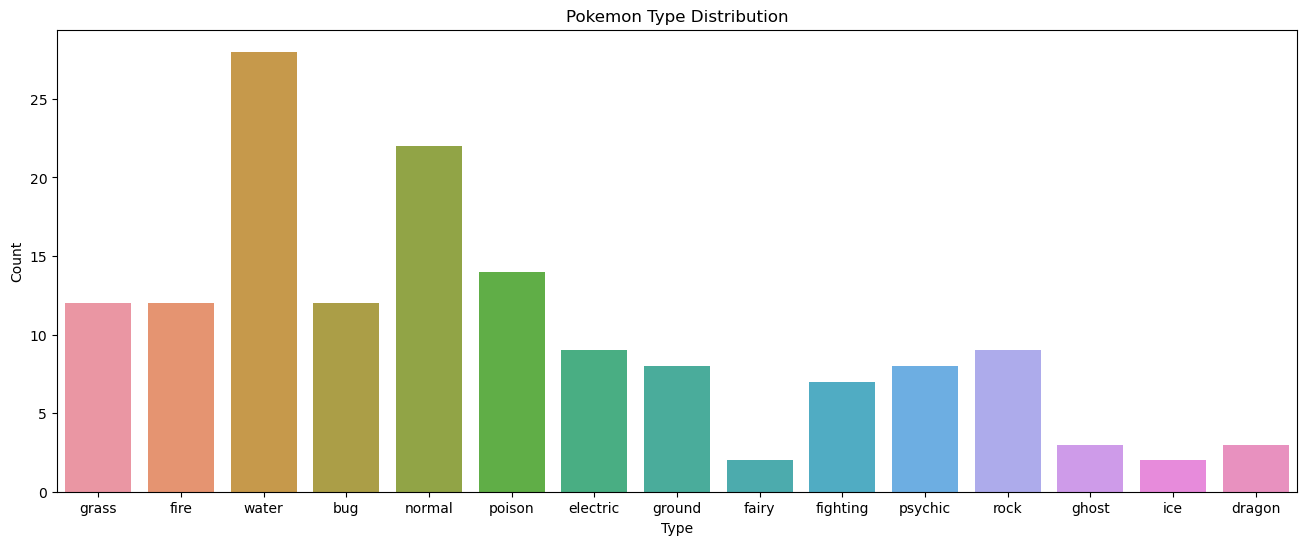

In [49]:
#import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Data visualization that shows the distribution of the pokemon types
plt.figure(figsize=(16, 6))
sns.countplot(x='type1', data=poke_df)
plt.title('Pokemon Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()
